In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
file_path = 'grb_cleaned_data.xlsx'  
df = pd.read_excel(file_path)

In [3]:
df.describe()

,BAT 90% Error Radius [arcmin],BAT T90 [sec],BAT Fluence (15-150 keV) [10^-7 erg/cm^2],BAT Fluence 90% Error (15-150 keV) [10^-7 erg/cm^2],BAT 1-sec Peak Photon Flux (15-150 keV) [ph/cm^2/sec],BAT 1-sec Peak Photon Flux 90% Error (15-150 keV) [ph/cm^2/sec],XRT 90% Error Radius [arcsec],XRT Time to First Observation [sec],XRT Early Flux (0.3-10 keV) [10^-11 erg/cm^2/s],XRT 11 Hour Flux (0.3-10 keV) [10^-11 erg/cm^2/s],...,White_mag,B_det,U_det,UVW1_det,UVM2_det,UVW2_det,White_det,Redshift,Galaxy Detected,Comment Type
count,448.000000,433.000000,441.000000,440.000000,432.000000,431.000000,430.000000,389.000000,2.610000e+02,4.330000e+02,...,355.000000,395.000000,394.000000,386.000000,363.000000,377.000000,355.000000,449.000000,449.000000,449.000000
mean,1.626853,95.398457,68.237438,1.940455,6.847523,0.364733,1.665669,2148.474036,2.344100e+11,2.544687e-01,...,18.984507,0.450633,0.500000,0.660622,0.787879,0.779841,0.301408,2.018370,0.155902,1.487751
std,0.776828,163.686497,200.571157,2.457121,21.090315,0.434874,0.558439,18464.335718,3.787009e+12,6.781124e-01,...,2.253682,0.498188,0.500636,0.474113,0.409374,0.414904,0.459517,1.402985,0.363167,0.842751
min,0.460000,0.018000,0.090000,0.000000,0.000000,0.000000,1.400000,43.880000,4.600000e-02,6.518467e-17,...,12.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014000,0.000000,0.000000
25%,1.000000,14.300000,6.900000,0.700000,0.932500,0.200000,1.400000,77.970000,9.500000e+01,2.403344e-02,...,17.340000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.947000,0.000000,1.000000
50%,1.400000,46.200000,19.000000,1.115000,1.900000,0.200000,1.400000,99.000000,2.810000e+02,7.583940e-02,...,19.440000,0.000000,0.500000,1.000000,1.000000,1.000000,0.000000,1.718500,0.000000,2.000000
75%,2.000000,113.200000,53.000000,2.000000,4.900000,0.400000,1.700000,144.450000,7.350000e+02,2.067214e-01,...,20.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.746667,0.000000,2.000000
max,10.000000,2100.000000,3100.000000,30.000000,331.000000,4.600000,6.000000,303300.000000,6.118100e+13,9.830520e+00,...,29.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.050000,1.000000,2.000000


In [ ]:
missing_info = (df.isna().sum() / len(df)) * 100

missing_info = missing_info.sort_values(ascending=False)
print(missing_info)

UVOT 90% Error Radius [arcsec]                                     46.102450
XRT Early Flux (0.3-10 keV) [10^-11 erg/cm^2/s]                    41.870824
White_det                                                          20.935412
White_mag                                                          20.935412
UVM2_mag                                                           19.153675
UVM2_det                                                           19.153675
UVW2_det                                                           16.035635
UVW2_mag                                                           16.035635
UVW1_mag                                                           14.031180
UVW1_det                                                           14.031180
XRT Time to First Observation [sec]                                13.363029
U_det                                                              12.249443
U_mag                                                              12.249443

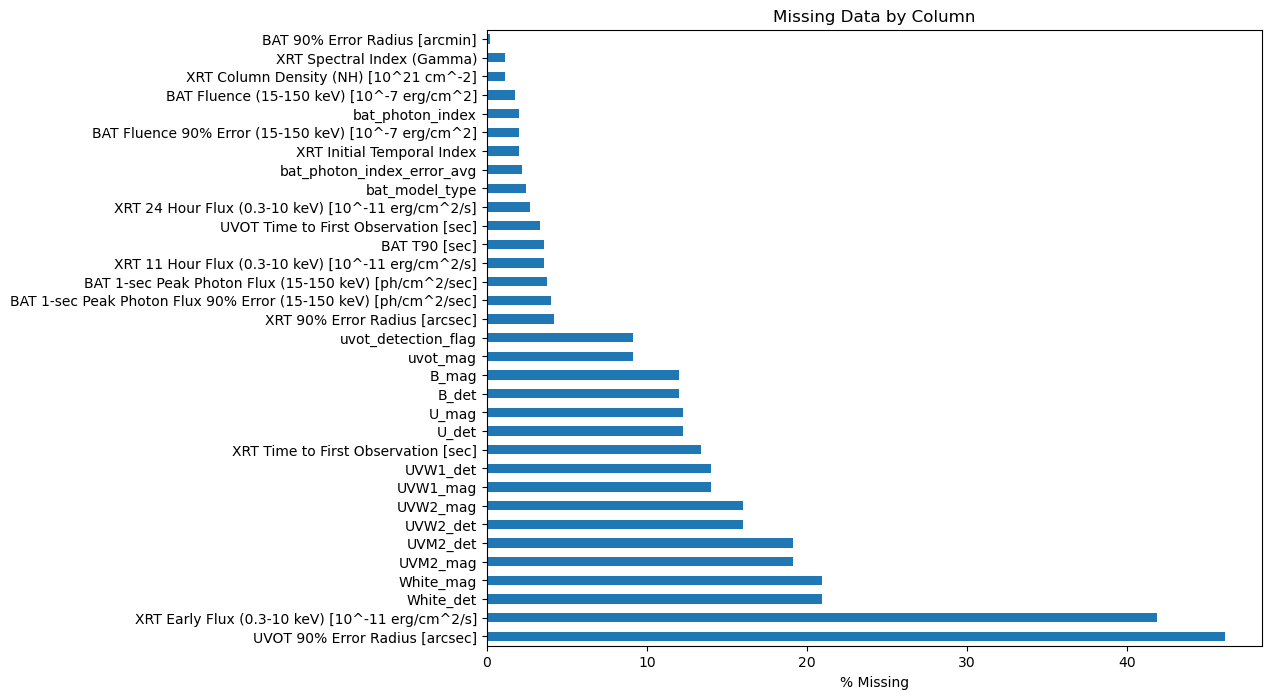

In [5]:
missing_info[missing_info > 0].plot(kind='barh', figsize=(10,8))
plt.xlabel('% Missing')
plt.title('Missing Data by Column')
plt.show()

In [6]:
#we have three cases
#the data was observed and measured,
#the data was observed, but had an upper bound limit,
#the data was not observed at all
#we will replace the NaN values with 2, which means not observed
det_columns = ['White_det', 'UVM2_det', 'UVW2_det', 'UVW1_det', 'U_det', 'B_det', 'uvot_detection_flag']
for col in det_columns:
    df[col] = df[col].fillna(2)

#UVOT 90% error radius and XRT early flux were the columns with the most missing data,
#so we will create a new column flagging that this data was not observed/measured
#this might have some physical significance. for the other variables the non detections is not a significant portion of the data.
df['UVOT_90_error_missing'] = df['UVOT 90% Error Radius [arcsec]'].isna().astype(int)
df['XRT_early_flux_missing'] = df['XRT Early Flux (0.3-10 keV) [10^-11 erg/cm^2/s]'].isna().astype(int)

In [7]:
# Drop all rows where BAT T90 is less than 2 seconds
flag = True #change this flag if you want to see the results of the knn imputation for BAT T90 time.
if flag:    
    df = df[(df['BAT T90 [sec]'] >= 2) | (df['BAT T90 [sec]'].isna())].copy()
    df.reset_index(drop=True, inplace=True) 
    print(f"Remaining GRBs: {len(df)}")
    df.to_excel('longgrbs_ready_for_imputation.xlsx', index=False)

Remaining GRBs: 419


a real issue for grbs is that some grbs are long and some are short morphologically. for this reason, we want to impute and determine which grbs are short and which grbs are long. ask about this decision? 

we find that all the nan t90 grbs were classified as long grbs through knn imputation. this suggests that we can just drop the short grbs and begin our new imputation